In [1]:
import os
import subprocess

import numpy as np
from pathlib import Path
import lossmaps as lm
import matplotlib.pyplot as plt

 If you are on SWAN and did not expect this warning, then restart and load the 'NXCals Pro' software stack.


In [2]:
path = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/no_blowup_imperfections/run_21.02.2025')

In [3]:
def get_lossmap_paths(path, file_name_base):

    n_jobs = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d | wc -l', shell=True))
    n_jobs_succeeded = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d -not -empty | wc -l', shell=True))
    
    job_files_list = []
    for i in range(n_jobs):
        current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}.json', shell=True)).decode('ascii').strip()
        #current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}.json', shell=True)).decode('ascii').strip()
        
        if os.path.exists(current_file_path):
            job_files_list.append(current_file_path)
        else:
            print(f'Job {i} failed')
    
    print(f'{n_jobs_succeeded} out of a total of {n_jobs} succeeded')
    if n_jobs_succeeded != len(job_files_list):
        print('ERROR: not all succeeded jobs paths were retrieved')
        
    return job_files_list

In [4]:
lms_paths = get_lossmap_paths(path, 'LM_ripple_shell_xl')

5000 out of a total of 5000 succeeded


In [6]:
import json
with Path(lms_paths[0]).open('r') as f:
    data = json.load(f)
data

{'collimator': {'s': [5220.5916],
  'name': ['tcsm.51932'],
  'length': [1.83],
  'n': [3.0]},
 'aperture': {'s': [5226.986553061224, 5251.336577210158],
  'name': ['loen.52002_aper_upstream', 'mba.52030..1_aper_upstream'],
  'n': [1.0, 1.0]},
 'machine_length': 6911.5038,
 'interpolation': 0.1,
 'reversed': False}

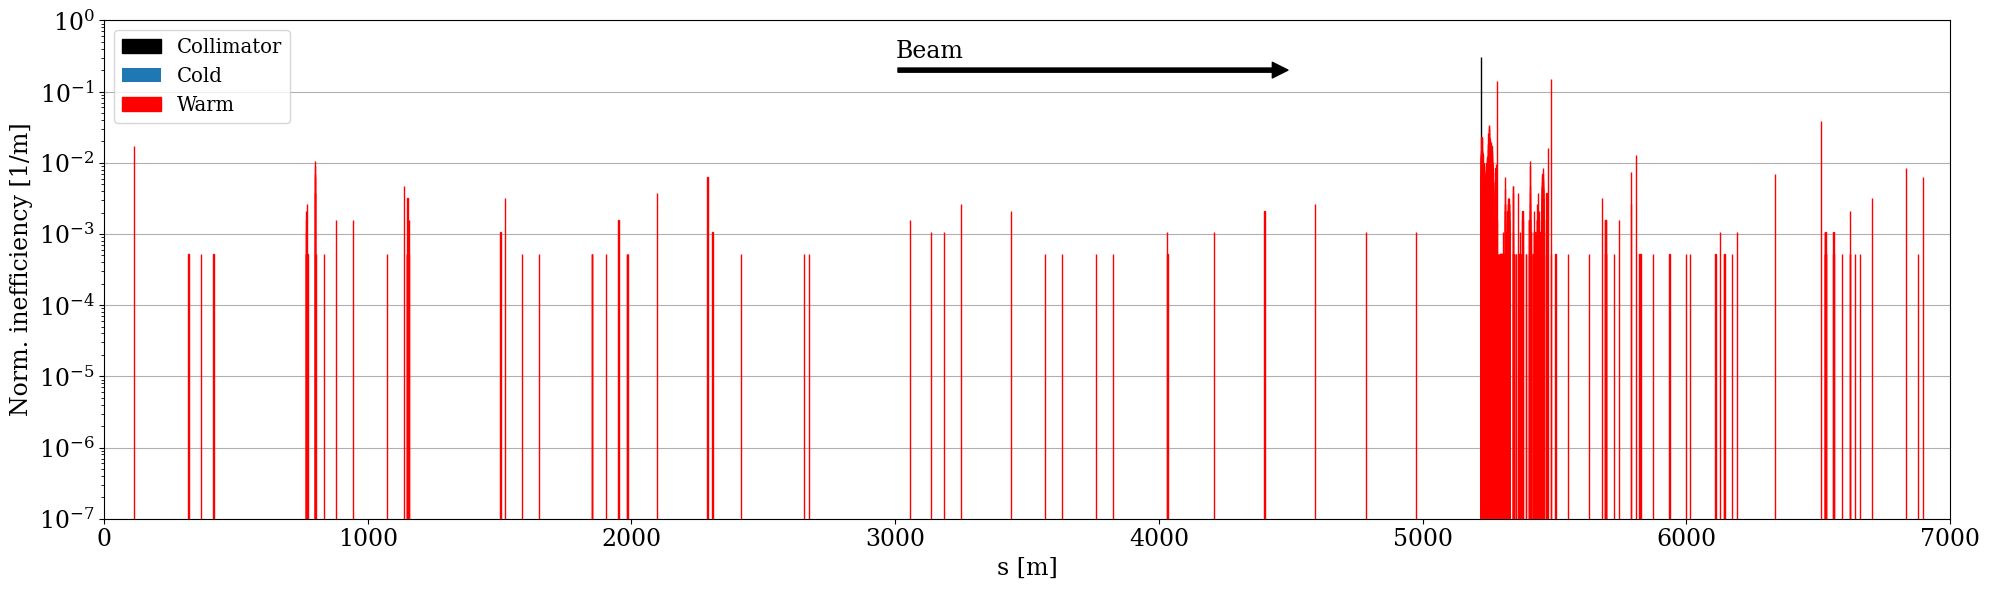

In [5]:
ThisLM = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
ThisLM.load_data_json(json_files=lms_paths)
fig = lm.plot_lossmap(ThisLM, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='LM_ripple_shell_xl_impfs.png ')
plt.show()

In [6]:
def get_particles_paths(path, file_name_base):

    n_jobs = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d | wc -l', shell=True))
    n_jobs_succeeded = int(subprocess.check_output(f'find {path}/job* -maxdepth 0 -type d -not -empty | wc -l', shell=True))
    
    job_files_list = []
    for i in range(n_jobs):
        current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}.pkl', shell=True)).decode('ascii').strip()
        #current_file_path = (subprocess.check_output(f'echo {path}/job_{i}/{file_name_base}_{plane}.json', shell=True)).decode('ascii').strip()
        
        if os.path.exists(current_file_path):
            job_files_list.append(current_file_path)
    
    print(f'{n_jobs_succeeded} out of a total of {n_jobs} succeeded')
    if n_jobs_succeeded != len(job_files_list):
        print('ERROR: not all succeeded jobs paths were retrieved')
        
    return job_files_list

In [7]:
part_paths = get_particles_paths(path, 'particles_ripple_shell_xl')

4999 out of a total of 4999 succeeded
ERROR: not all succeeded jobs paths were retrieved


In [8]:
import pickle
import os

In [9]:
particle_dict = {}
c = 0
for file_path in part_paths:
    c+=1
    if c%100 == 0: print(c/len(part_paths))
    if file_path.endswith(".pkl"):  # Ensure it's a pickle file
        job_name = os.path.basename(os.path.dirname(file_path))  # Extract job name from folder

        with open(file_path, "rb") as f:
            data = pickle.load(f)
            
            if isinstance(data, dict):  # Ensure it's a dictionary
                particle_dict[job_name] = data  # Store under job name
            else:
                print(f"Warning: {file_path} does not contain a dictionary")


0.020008003201280513
0.040016006402561026
0.060024009603841535
0.08003201280512205
0.10004001600640255
0.12004801920768307
0.1400560224089636
0.1600640256102441
0.18007202881152462
0.2000800320128051
0.22008803521408563
0.24009603841536614
0.2601040416166467
0.2801120448179272
0.30012004801920766
0.3201280512204882
0.3401360544217687
0.36014405762304924
0.38015206082432973
0.4001600640256102
0.42016806722689076
0.44017607042817125
0.4601840736294518
0.4801920768307323
0.5002000800320128
0.5202080832332934
0.5402160864345739
0.5602240896358543
0.5802320928371348
0.6002400960384153
0.6202480992396959
0.6402561024409764
0.6602641056422569
0.6802721088435374
0.7002801120448179
0.7202881152460985
0.740296118447379
0.7603041216486595
0.78031212484994
0.8003201280512204
0.820328131252501
0.8403361344537815
0.860344137655062
0.8803521408563425
0.9003601440576231
0.9203681472589036
0.9403761504601841
0.9603841536614646
0.9803921568627451


In [10]:
turns_lost = {}

for job in particle_dict:
    for i in range(len(particle_dict[job]['state'])):
        if particle_dict[job]['state'][i] < 1:
            turn = particle_dict[job]['at_turn'][i]
            if turn in turns_lost:
                turns_lost[turn] += 1
            else:
                turns_lost[turn] = 1

In [14]:
turns_list = np.array(list(turns_lost.keys()))
vals = np.array(list(turns_lost.values()))

In [13]:
turns_list

array(dict_keys([np.int64(117594), np.int64(21228), np.int64(17016), np.int64(9121), np.int64(23), np.int64(957758), np.int64(34924), np.int64(8212), np.int64(884), np.int64(282), np.int64(39), np.int64(342427), np.int64(26575), np.int64(26849), np.int64(4855), np.int64(2716), np.int64(46), np.int64(0), np.int64(267762), np.int64(121378), np.int64(58912), np.int64(1286), np.int64(68124), np.int64(47903), np.int64(14944), np.int64(82), np.int64(278907), np.int64(15393), np.int64(3472), np.int64(3060), np.int64(2699), np.int64(418201), np.int64(7995), np.int64(866), np.int64(34), np.int64(17), np.int64(490229), np.int64(21953), np.int64(75), np.int64(28), np.int64(7), np.int64(2), np.int64(148), np.int64(11267), np.int64(11239), np.int64(7029), np.int64(185), np.int64(58), np.int64(31), np.int64(61803), np.int64(4112), np.int64(383), np.int64(56770), np.int64(20140), np.int64(76), np.int64(681852), np.int64(25183), np.int64(19329), np.int64(439), np.int64(60), np.int64(1801), np.int64(17

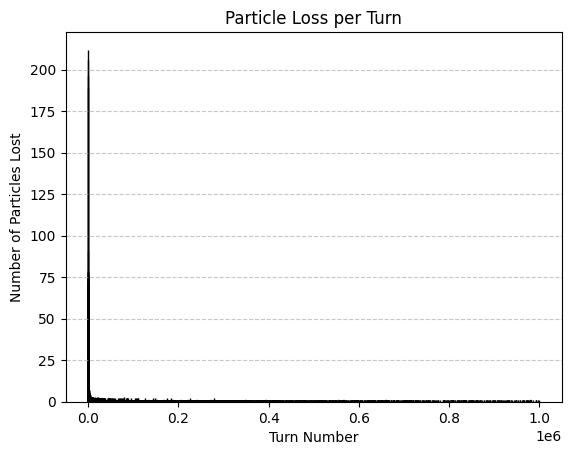

In [15]:
plt.bar(turns_list, vals, width=10, color="royalblue", edgecolor="black")

# Labels and title
plt.xlabel("Turn Number")
plt.ylabel("Number of Particles Lost")
plt.title("Particle Loss per Turn")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Pencilbeam with errors without ripple

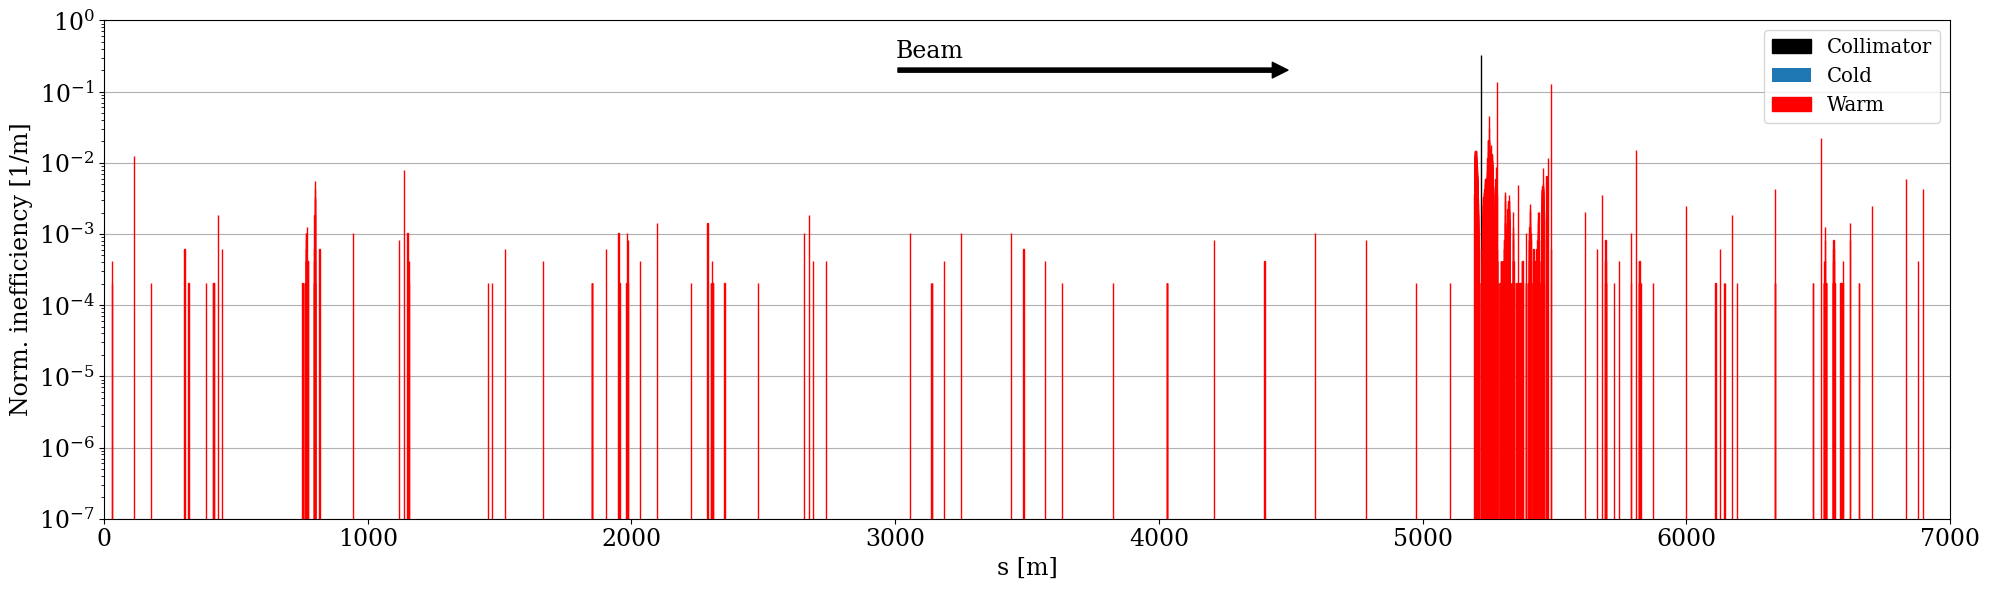

In [16]:
LM_errors = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
LM_errors.load_data_json(json_files=['pencilbeam_LM_errors.json'])
fig = lm.plot_lossmap(LM_errors, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='LM_pencil_errors.png ')
plt.show()

# Pencil beam with ripple

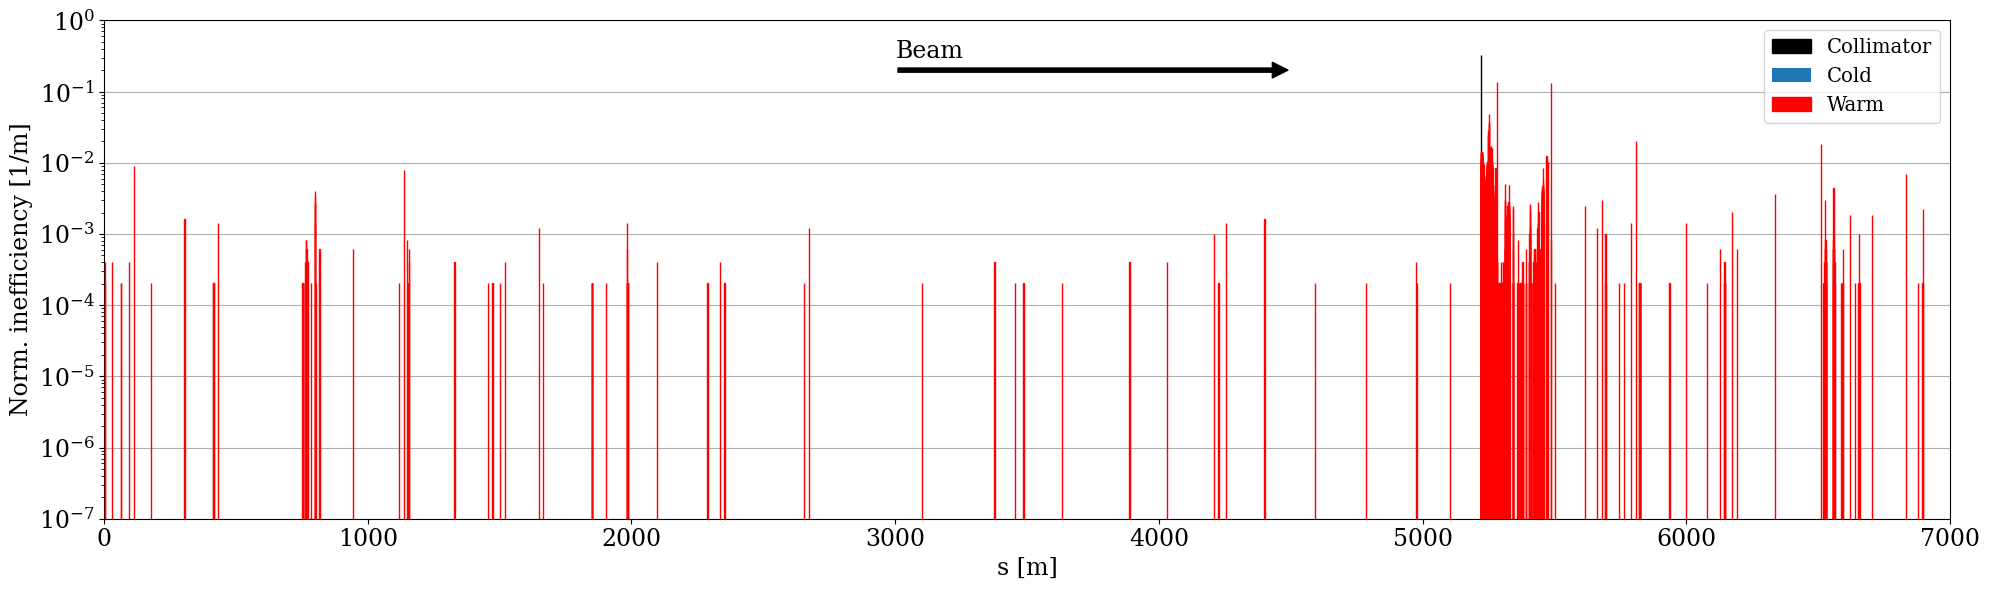

In [17]:
LM_ripple = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
LM_ripple.load_data_json(json_files=['pencilbeam_LM_ripple.json'])
fig = lm.plot_lossmap(LM_ripple, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='LM_pencil_ripple.png ')
plt.show()

# Pencil beam with ripple and errors

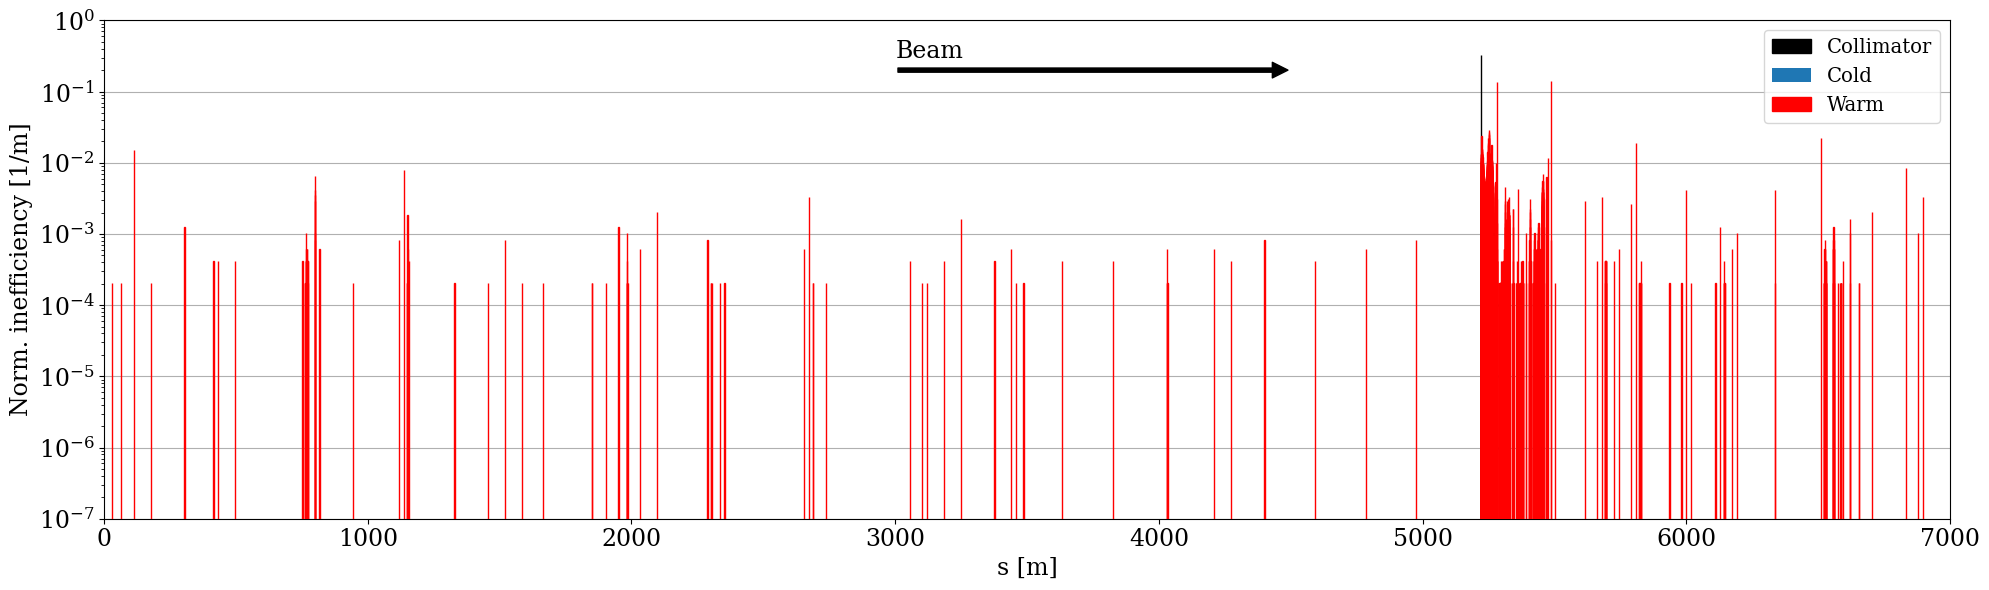

In [18]:
LM_ripple_errors = lm.SimulatedLossMap(lmtype=lm.LMType.B1H, machine=lm.Machine.SPS)
LM_ripple_errors.load_data_json(json_files=['pencilbeam_LM_ripple_errors.json'])
fig = lm.plot_lossmap(LM_ripple_errors, xlim=(0,7000), show_zoom=False, ylim=[0.0000001,1], outfile='LM_pencil_ripple_errors.png ')
plt.show()